<a href="https://colab.research.google.com/github/dookda/cmu_deep_learning/blob/main/YOLO8_sky_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


install labelme

`pip install labelme

`pip install pandas ultralytics numpy matplotlib seaborn pytest-warnings PyYAML random Pillow opencv-python`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [3]:
dataDir = os.path.join(os.getcwd(), 'Dataset')
print(dataDir)

/Users/sakdahomhuan/Dev/cmu_py499/building/Dataset


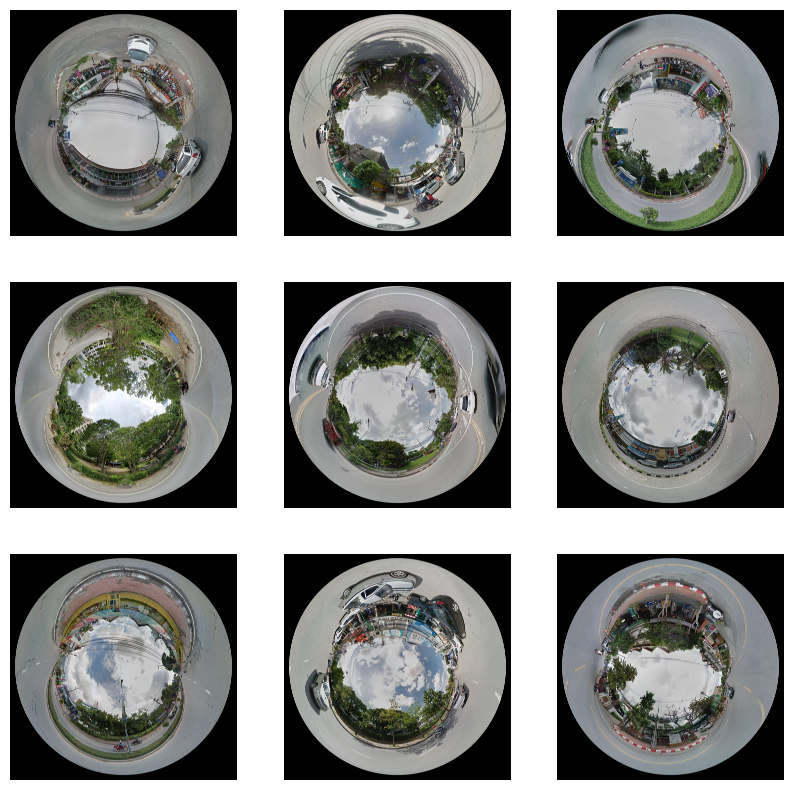

In [17]:
trainImagePath = os.path.join(dataDir, 'train', 'images')
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.png')]
randomImages = random.sample(imageFiles, 9)

plt.figure(figsize=(10,10))

for i, image_file in enumerate(randomImages):
  image_path = os.path.join(trainImagePath, image_file)
  image = Image.open(image_path)
  plt.subplot(3, 3, i + 1)
  plt.imshow(image)
  plt.axis('off')


In [18]:
model = YOLO('yolov8n-seg.pt')

In [19]:
yamlFilePath = os.path.join(dataDir, 'dataset.yaml')
print(yamlFilePath)

/Users/sakdahomhuan/Dev/cmu_py499/proj_earn_gsv/Dataset/dataset.yaml


In [ ]:
results = model.train(
    data=yamlFilePath,
    epochs=100,
    imgsz=640,
    batch=16,
    optimizer='auto',
    lr0=0.0001,
    lrf=0.01,
    dropout=0.25,
    device='mps', #'mps', 'cpu' or '0,1,2,3',
    seed=42,
    project=os.getcwd(), 
    name='model' 
)

In [15]:
bestModelPath = os.joint(os.getcwd(), 'yolov8n-seg/weights/best.pt')  
bestModel = YOLO(bestModelPath)

In [ ]:
validImagePath = os.path.join(dataDir, 'valid', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = bestModel.predict(source=imagePath, imgsz=640)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()